# Transfer Learning: **Feature Extraction(with Data Augmentation)**

Too much overwhelming title?

Let's break it down!

## What is Data Augmentation?

It is a technique used to artificially increase the size and diversity of a dataset by applying various transformations to the existing data samples.

These transformations create new, slightly modified versions of the original data, which can help improve the robustness and generalization ability of machine learning models.

-- Common data augmentation techniques for image data include:

* **Rotation**: Rotating the image by a certain angle (e.g., 90 degrees, 180 degrees) around its center.
* **Translation**: Shifting the image horizontally and/or vertically by a certain distance.
* **Scaling**: Resizing the image by stretching or shrinking it along its dimensions.
* **Flipping**: Mirroring the image horizontally or vertically.
* **Shearing**: Tilting the image along its axes by varying degrees.
* **Zooming**: Zooming into or out of the image by scaling its dimensions.
* **Brightness Adjustment**: Increasing or decreasing the overall brightness of the image.
* **Contrast Adjustment**: Increasing or decreasing the contrast between pixels in the image.
* **Noise Addition**: Adding random noise (e.g., Gaussian noise) to the image.





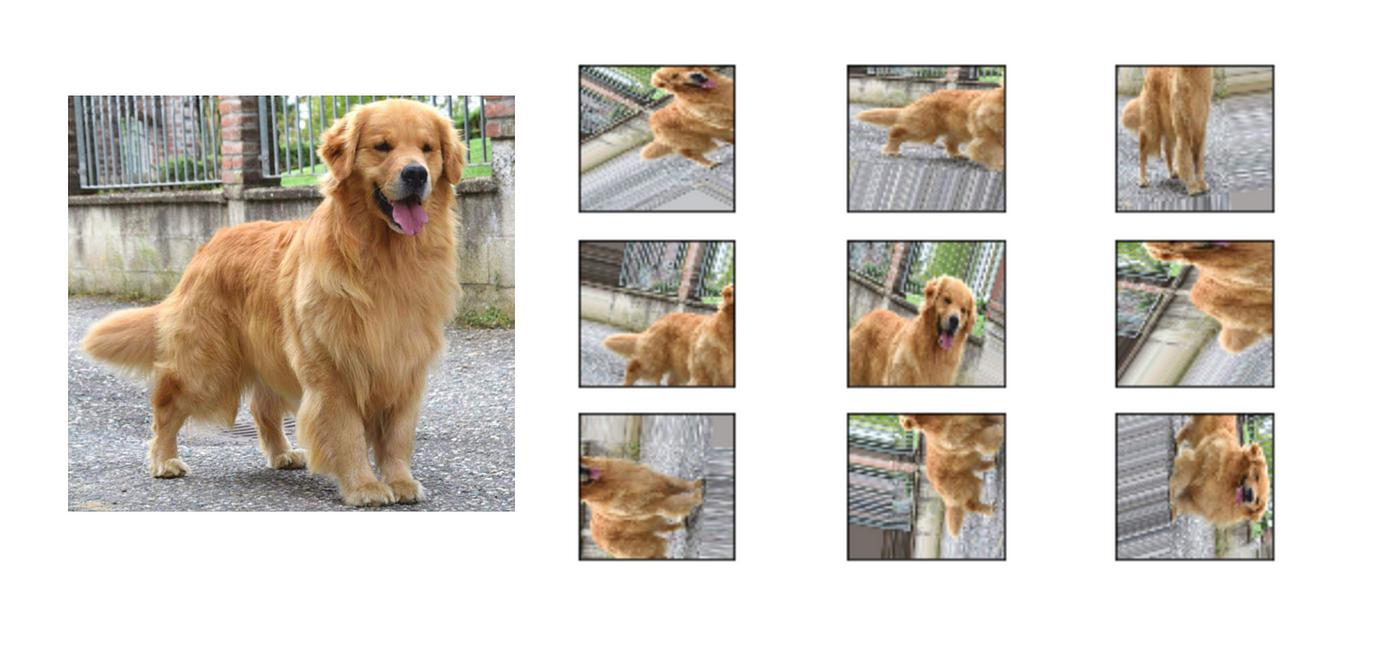

## When to use Data Augmentation?

Data augmentation is particularly useful in scenarios where the size of the training dataset is limited, as it allows the model to see a larger variety of examples during training without requiring additional labeled data.

By exposing the model to a wider range of variations in the input data, data augmentation helps prevent **overfitting** and improves the model's ability to generalize to unseen examples.

Unfamiliar with other words?

Do not forget to checkout [What is Transfer Learning?](https://github.com/nikitaprasad21/DL-Cheat-Codes/blob/main/CNN-Models/transfer_learning.ipynb) before this!

## CNN Model Implementation

## Importing Dataset:


In this implementation I am using Cat-Dog Data from Kaggle:

https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:04<00:00, 212MB/s]
100% 1.06G/1.06G [00:04<00:00, 246MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.applications.vgg16 import VGG16

## VGGNET Convolutional Layers

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


## Freezing the Convo-Layers

In [6]:
conv_base.trainable = False

In [7]:
model = Sequential()

model.add(conv_base)

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## Data Augmentation

In [11]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [12]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-14-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 168s 255ms/step - loss: 0.3108 - accuracy: 0.8670 - val_loss: 0.2146 - val_accuracy: 0.9116
Epoch 2/10
625/625 [==============================] - 157s 251ms/step - loss: 0.2406 - accuracy: 0.8964 - val_loss: 0.2056 - val_accuracy: 0.9120
Epoch 3/10
625/625 [==============================] - 156s 249ms/step - loss: 0.2305 - accuracy: 0.9003 - val_loss: 0.1907 - val_accuracy: 0.9186
Epoch 4/10
625/625 [==============================] - 154s 246ms/step - loss: 0.2121 - accuracy: 0.9086 - val_loss: 0.1934 - val_accuracy: 0.9198
Epoch 5/10
625/625 [==============================] - 156s 250ms/step - loss: 0.2078 - accuracy: 0.9111 - val_loss: 0.1870 - val_accuracy: 0.9182
Epoch 6/10
625/625 [==============================] - 154s 246ms/step - loss: 0.1960 - accuracy: 0.9169 - val_loss: 0.1861 - val_accuracy: 0.9194
Epoch 7/10
625/625 [==============================] - 155s 248ms/step - loss: 0.1866 - accuracy: 0.9215 - val_loss: 0.1950 -

Upon careful analysis, it's noted that not only the training accuracy has decreased from 98.21% to 92.94%, but the validation accuracy has increased marginally from 90% to 91% indicating that we're abled to reduce overfitting within the system.

Let's plot graphs to validate this observation!

In [15]:
import matplotlib.pyplot as plt

## Train VS Validation Accuracy


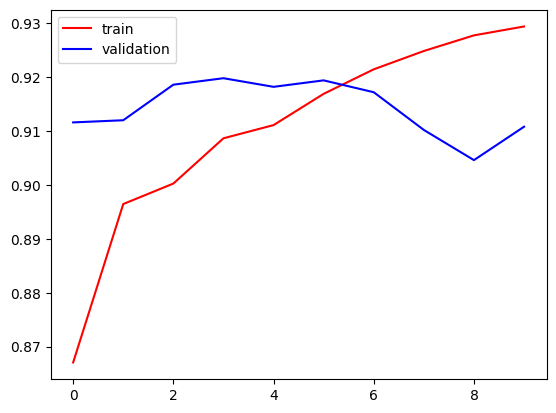

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## Train VS Validation Loss


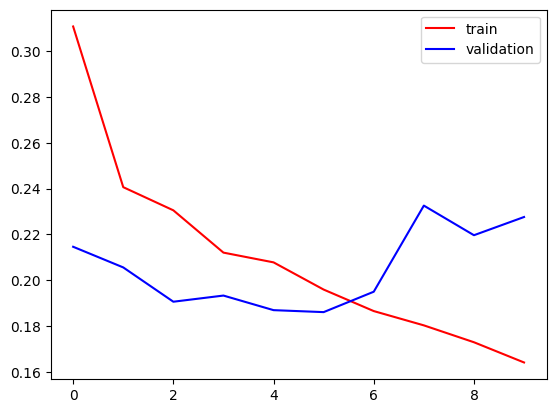

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

There is a marginal difference btw the two!

Hence, we were able to reduce Overfitting of our model.

> Don't forget to **Star** this Repo and follow up for Part-3, where we will apply Fine-Tuning on our system. Consider sharing this with your friends!